In [ ]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


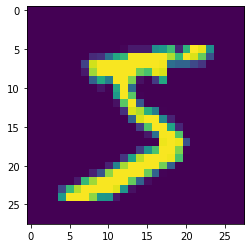

In [ ]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [ ]:
#checking shape of single image
X_train[0].shape

(28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)#60000 for data points, 28x28=shape of each image, 1 is for the channel(color=grayscale)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0]#checking target value format

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))#64 number of 3x3 filters::channel=1 as in input
model.add(Conv2D(32, kernel_size=3, activation='relu'))#32 number of 3x3 filters::channel=64(from previous layer)
model.add(Flatten())#flatten required to form neurons to pass to dense layer::24x24x32
model.add(Dense(10, activation='softmax'))#params::24x24x32x10+10

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_7 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2282 - accuracy: 0.9525 - val_loss: 0.0822 - val_accuracy: 0.9734
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0710 - accuracy: 0.9786 - val_loss: 0.0844 - val_accuracy: 0.9775
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0462 - accuracy: 0.9850 - val_loss: 0.0919 - val_accuracy: 0.9765


In [ ]:
print("Training Accuracy:")
train_loss,train_acc=model.evaluate(X_train,  y_train, verbose=2)
print("Testing Accuracy:")
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

Training Accuracy:
1875/1875 - 4s - loss: 0.0282 - accuracy: 0.9904
Testing Accuracy:
313/313 - 1s - loss: 0.0919 - accuracy: 0.9765


In [ ]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[4.62389189e-11, 7.19137139e-14, 2.57905679e-08, 2.62828148e-10,
        6.47184126e-18, 1.64318510e-13, 2.15323526e-15, 1.00000000e+00,
        9.24095644e-09, 3.57048147e-09],
       [2.95629232e-09, 3.62189341e-11, 1.00000000e+00, 1.63954031e-10,
        1.25988131e-16, 9.72821559e-18, 2.87338731e-09, 2.84640869e-16,
        6.20362858e-11, 1.32444689e-14],
       [1.48322485e-07, 9.99740660e-01, 2.25951371e-05, 2.47477538e-10,
        8.00869657e-06, 7.35461967e-08, 7.45274775e-08, 1.29154250e-06,
        2.27139986e-04, 6.76452672e-10],
       [9.99987006e-01, 3.06863963e-13, 7.14337034e-08, 3.92929938e-13,
        1.41704296e-11, 5.36674982e-10, 2.63859707e-08, 2.66420830e-14,
        2.19135750e-08, 1.28657575e-05]], dtype=float32)

In [ ]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)